# Universidad de Buenos Aires
# Deep Learning - Examen



## Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$

(a) Aplicar gradiente e igualar a zero para encontrar los valores de x e y donde z tiene un máximo. Cuál es el valor del máximo?

```
grad(Z) = [ dz/dx , dz/dy ] = [-2*(x-2) , -2*(y-3) ] = [ 0 , 0 ]

-2*(x-2) = 0 => x = 2
-2*(y-3) = 0 => y = 3

El máximo de la función se encuentra en el punto (2,3).
```

(b) Aplicar SGD para encontrar la ubicación del máximo de manera numérica.

Encontrar el máximo de la función dada es lo mismo que encontrar el mínimo de la función multiplicada por -1.

In [ ]:
def f(x,y):
  return (x - 2)**2 +(y - 3)**2 - 4

def fpx(x):
  return 2*(x - 2)

def fpy(y):
  return 2*(y - 3)

def fp(x,y):
  return 2*(x - 2) + 2*(y - 3)

Min x: 2.000012481099942
Min y: 2.999937594500294


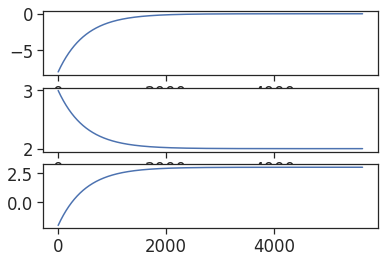

In [ ]:
alpha = 0.001
tol = 0.0001

x = np.random.randint(low=-5,high=5)
y = np.random.randint(low=-5,high=5)
g = 1

hist_x = []
hist_y = []
hist_g = []

while abs(g) > tol:
  gx = fpx(x)
  gy = fpy(y)
  x = x - alpha * gx
  y = y - alpha * gy
  hist_x.append(x)
  hist_y.append(y)
  g = fp(x,y)
  hist_g.append(g)

fig, axs = plt.subplots(3)
axs[0].plot(hist_g)
axs[1].plot(hist_x)
axs[2].plot(hist_y)

print("Min x: " + str(x))
print("Min y: " + str(y))

Vemos que el máximo está en (2,3) y coincide con el obtenido analíticamente.

## Ejercicio 2 

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing

El dataset son compras de productos que diferentes clientes realizaron durante el black sales.

El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuanto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gatar mucha plata (más de 9000) o poca plata (menos de 9000).

Vamos a construir 5 modelos:

* Un modeo que siempre predice que los clientes gastan mucha plata en todos los productos.
* Un modelo del tipo de Regresión Logīstica Lineal. 
* Un modelo del tipo Random Forest.
* Un modelo del tipo Deep Learning sin embeddings.
* Un modelo del tipo Deep Learning con embeddings.

A continuación está el código para conectar Google Drive, algunos imports que vas a necesitar (podes agregar más) y el comando para levantar el dataset.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

In [124]:
path_to_ds = "/content/drive/MyDrive/Colab Notebooks/black_sales.csv"
dataset = pd.read_csv(path_to_ds)

### (a) Análisis de datos

1. Imprimir las 5 primeros filas del dataset. 
2. Imprimir los tipos de cada columna del dataset.
3. Imprimir las estadísticas básicas de cada columnas. 
4. Hacer un histograma de la variable Purchase.
5. Que columnas son categóricas y cuales son numéricas?
6. Para las columnas categóricas, cuántas clases únicas tienen cada una?

In [ ]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [125]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068,NaN,NaN,NaN,1.00303e+06,1727.59,1e+06,1.00152e+06,1.00308e+06,1.00448e+06,1.00604e+06
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068,NaN,NaN,NaN,8.07671,6.52266,0,2,7,14,20
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068,NaN,NaN,NaN,0.409653,0.49177,0,0,0,1,1
Product_Category_1,550068,NaN,NaN,NaN,5.40427,3.93621,1,1,5,8,20
Product_Category_2,376430,NaN,NaN,NaN,9.84233,5.08659,2,5,9,15,18


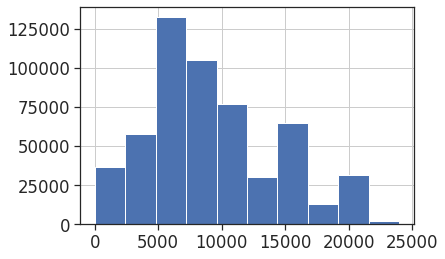

In [126]:
dataset.Purchase.hist()

Si bien hay variables numéricas y objetos en el dataset, todas la variables representan variables categóricas excepto la salida (Purchase) la cual será binarizada más adelante.

In [132]:
# Valores únicos para cada variable
for col in dataset.drop(columns="Purchase"):
    print(col + "(" + str(len(dataset[col].unique())) + "): " + str(dataset[col].unique()))

User_ID(5891): [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID(3631): ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender(2): ['F' 'M']
Age(7): ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation(21): [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category(3): ['A' 'C' 'B']
Stay_In_Current_City_Years(5): ['2' '4+' '3' '1' '0']
Marital_Status(2): [0 1]
Product_Category_1(20): [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2(18): [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3(16): [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


### (b) Limpieza de datos

1. Que columnas tienen NaNs?
2. Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 


In [ ]:
!pip install funpymodeling
import funpymodeling as fp

In [6]:
fp.status(dataset).sort_values('q_nan', ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
10,Product_Category_3,383247,0.696727,0,0.000000,15,float64
9,Product_Category_2,173638,0.315666,0,0.000000,17,float64
0,User_ID,0,0.000000,0,0.000000,5891,int64
1,Product_ID,0,0.000000,0,0.000000,3631,object
2,Gender,0,0.000000,0,0.000000,2,object
3,Age,0,0.000000,0,0.000000,7,object
4,Occupation,0,0.000000,69638,0.126599,21,int64
5,City_Category,0,0.000000,0,0.000000,3,object
6,Stay_In_Current_City_Years,0,0.000000,0,0.000000,5,object
7,Marital_Status,0,0.000000,324731,0.590347,2,int64


Vemos que las columnas Product_Category_3 y Product_Category_2 son las únicas que presentan valores faltantes y tienen un 70% y 32% de datos faltantes respectivamente. Se imputan estos nans por el valor 999.

In [6]:
dataset.loc[dataset['Product_Category_2'].isna() , 'Product_Category_2'] = 999
dataset.loc[dataset['Product_Category_3'].isna() , 'Product_Category_3'] = 999

### (c) Ingeniería de features

1. Transformar todas las variables categoricas (expecto User_Id y Product_Id) en one-hot-encoding. 
2. Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.
3. Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?
4. Porque es importante guardar el mapping de id a index?
5. Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.
6. Normalizar todos los valores entre 0 y 1.
7. Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 

In [7]:
# Codificación de variables categóricas
cols = dataset.columns.drop(['User_ID','Product_ID','Purchase']).to_numpy()
dataset = pd.get_dummies(dataset, columns = cols)

In [8]:
# User_ID mapping
user_id = dataset['User_ID']
dataset.drop(columns=['User_ID'], inplace=True)

In [49]:
user_unique, inverse = np.unique(user_id, return_inverse=True)
user_id_to_index = {key: value for key,value in zip(user_id,inverse)}
user_index = np.array([user_id_to_index[id] for id in user_id])

In [10]:
# Product_ID mapping
product_id = dataset['Product_ID']
dataset.drop(columns=['Product_ID'], inplace=True)

In [50]:
product_unique, inverse = np.unique(product_id, return_inverse=True)
product_id_to_index = {key: value for key,value in zip(product_id,inverse)}
product_index = np.array([product_id_to_index[id] for id in product_id])

Es importante el mapeo de los ids (que pueden ser cualquier tipo de variable categorica) a index entre 0 y N-1 siendo N la cantidad de valores de id unicos. Eston IDs son alimentados a un layer de embeddings que, una vez entrenado, dará una buena representación de la variable con un número de salidas muy inferior a N.
Es importante guardar los arreglos index->id e id->index para ir y volver tanto al momento de entrenar como de predecir.

In [12]:
# Binarizar variable de salida según si es mayor a 9000 o no
dataset['Purchase'] = dataset.Purchase.apply(lambda label: 0 if label <=9000 else 1)
print(len(dataset[dataset['Purchase'] == 0]))
print(len(dataset[dataset['Purchase'] == 1]))

330871
219197


No tiene sentido normalizar el dataset ya que todas las variables se trataron como categoricas y se codificaron por ende el dataset consiste completamente en 1s y 0s.

In [13]:
label = dataset.Purchase.to_numpy()
final_data = dataset.drop(['Purchase'], axis=1, inplace=False).to_numpy()

In [14]:
# Dataset split
n = final_data.shape[0]
idx = np.random.permutation(np.arange(0,n))
a = int(0.7*n)
b = int(0.9*n)
train_idx = idx[:a]
valid_idx = idx[a:b]
test_idx =  idx[b:]
assert len(train_idx) + len(valid_idx) + len(test_idx) == len(idx)

In [15]:
user_index_train = user_index[train_idx]
product_index_train = product_index[train_idx]
X_train = final_data[train_idx,:]
y_train = label[train_idx]

user_index_valid = user_index[valid_idx]
product_index_valid = product_index[valid_idx]
X_valid = final_data[valid_idx,:]
y_valid = label[valid_idx]

user_index_test = user_index[test_idx]
product_index_test = product_index[test_idx]
X_test = final_data[test_idx]
y_test = label[test_idx]

### (d) Modelo base

1. Entrenar un modelo base que siempre de como predicción que el purchase del cliente es de valor elevado.
2. Calcular el AUC de este modelo.
3. Porque es importante siempre definir un modelo base?

In [16]:
class BaseModel:
  def predict(self,X):
    return np.ones((X.shape[0],1))

In [17]:
baseModel = BaseModel()
yp_bm = baseModel.predict(X_test)

In [139]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, yp_bm)
bm_auc = metrics.auc(fpr,tpr)
print(bm_auc)

0.5


Es importante definir un modelo base para poder comparar el rendimiento de los demás modelos, es decir, para tener un punto de referencia.

### (e) Regresión logísica

1. Entrenar un modelo de regresión logística que sea mejor que el modelo base (no usar User_Id y Product_Id). 
2. Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?
3. Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

In [137]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
lr_test_scores = lr_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_test_scores[:,1])
lr_auc = metrics.auc(fpr,tpr)
print(lr_auc)

0.9277830025346558


Es importante normalizar los datos antes de entrenar un modelo de regresión logística porque sino el modelo va a tender a darle más importancia a las variables que tienen magnitudes más grandes y viceversa.

Es importante usar una métrica AUC para un problema de clasificación binaria para dar un valor estándarizado de performance, en este caso teniendo en cuenta los verdaderos positivos y los falsos positivos. 

### (f) Random forest

1. Entrenar un modelo de Random Forest que sea mejor que el modelo base (no usar User_Id y Product_Id).

In [135]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [141]:
rf_test_scores = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_test_scores[:,1])
rf_auc = metrics.auc(fpr,tpr)
print(rf_auc)

0.9251817528558526


### (g) Deep learning sin embeddings

1. Entrenar un modelo de Deep Learning que no utilice embeddings (no usar User_Id y Product_Id).

In [22]:
import torch
from torch.utils.data import Dataset, DataLoader

In [105]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        super().__init__()
        self.X = X
        self.Y = Y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx, :], self.Y[idx]

In [106]:
training = CustomDataset(X_train, y_train)
validation = CustomDataset(X_valid, y_valid)
testing = CustomDataset(X_test, y_test)

In [107]:
print(len(training))
print(len(validation))
print(len(testing))

385047
110014
55007


In [108]:
training_dataloader = DataLoader(training, batch_size=1000, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size=1000, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=1000, shuffle=True)

In [109]:
X_train.shape

(385047, 94)

In [118]:
class NNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=94, out_features=500, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=500, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=1, bias=True)
        # Vamos a usar como función de costo la BCEWithLogitsLoss que incluye una sigmoid por lo cual no hace falta ponerla acá.
        # La ventaja de usar esta función es que es numéricamente más estable
    
    def forward(self, x):
        z1 = self.linear_1(x)
        a1 = self.relu_1(z1)
        z2 = self.linear_2(a1)
        a2 = self.relu_2(z2)
        y = self.linear_3(a2)
        return y

In [119]:
nnet = NNet()
print(nnet)

NNet(
  (linear_1): Linear(in_features=94, out_features=500, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=500, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=1, bias=True)
)


In [120]:
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') # Loss function
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.1) # Optimizer

In [121]:
# Mover modelo a la RAM de la GPU si hay GPU disponible.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nnet.to(device)

for epoch in range(50):

    running_loss = 0
    nnet.train()
    for i, data in enumerate(training_dataloader):

        # batch
        x, y = data
        x = x.to(device).float()
        y = y.to(device).float().reshape(-1,1)

        # set gradient to zero
        optimizer.zero_grad()

        # forward 
        y_hat = nnet(x)

        # loss
        loss = criterion(y_hat, y)

        # backward
        loss.backward()

        # update of parameters
        optimizer.step()

        # compute metrics and statistics
        running_loss += loss.item()
    
    nnet.eval()
    with torch.no_grad():
        nnet_test_scores = []
        truth = []
        for i, data in enumerate(test_dataloader):
            # batch
            x, y = data
            x = x.to(device).float()
            y = y.to(device).float().reshape(-1,1)

            # forward 
            y_hat = nnet(x)
            y_hat = torch.sigmoid(y_hat) # Agrego la sigmoid porque en entrenamiento la sigmoid esta incluida en la fx de costo

            # accumulate data
            truth += list(y.cpu().numpy()) 
            nnet_test_scores += list(y_hat.cpu().numpy())

        fpr, tpr, thresholds = metrics.roc_curve(truth, nnet_test_scores)
        auc = metrics.auc(fpr, tpr)
        print(f"Epoch = {epoch} | loss = {running_loss / len(training)} | auc = {auc}")

Epoch = 0 | loss = 0.4503556656535359 | auc = 0.9291166062861691
Epoch = 1 | loss = 0.31120955916042775 | auc = 0.9304816950353263
Epoch = 2 | loss = 0.31056873639243837 | auc = 0.9306232785283136
Epoch = 3 | loss = 0.30944374621149906 | auc = 0.9312709164927323
Epoch = 4 | loss = 0.308695019838683 | auc = 0.9311350789307554
Epoch = 5 | loss = 0.30903955869099553 | auc = 0.9309461868815239
Epoch = 6 | loss = 0.30809719031689786 | auc = 0.931721775808891
Epoch = 7 | loss = 0.3081222520453407 | auc = 0.9311778991898266
Epoch = 8 | loss = 0.3081686784740067 | auc = 0.9317129447772112
Epoch = 9 | loss = 0.30735131789584186 | auc = 0.9309885828702661
Epoch = 10 | loss = 0.3072779735874911 | auc = 0.9316333647710059
Epoch = 11 | loss = 0.3072856024098876 | auc = 0.9308302976135908
Epoch = 12 | loss = 0.30716581810015053 | auc = 0.9311839072716095
Epoch = 13 | loss = 0.3070972666883959 | auc = 0.929922802695963
Epoch = 14 | loss = 0.3079440477255387 | auc = 0.9318197367234693
Epoch = 15 | los

In [142]:
dl_auc = 0.9316

### (h) Deep learning con embeddings

1. Entrenar un model de Deep Learning que utilice embeddings de los usuarios y los productos.

In [46]:
class CustomDatasetWithEmbedding(Dataset):
    def __init__(self, X, user_idx, product_idx, Y):
        super().__init__()
        self.user_idx = user_idx
        self.product_idx = product_idx
        self.X = X
        self.Y = Y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx,:], self.user_idx[idx], self.product_idx[idx], self.Y[idx]

In [47]:
training = CustomDatasetWithEmbedding(X_train, user_index_train, product_index_train, y_train)
validation = CustomDatasetWithEmbedding(X_valid, user_index_valid, product_index_valid, y_valid)
testing = CustomDatasetWithEmbedding(X_test, user_index_test, product_index_test, y_test)

In [48]:
training_dataloader = DataLoader(training, batch_size=1000, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size=1000, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=1000, shuffle=True)

In [88]:
class NNet(torch.nn.Module):
    def __init__(self, number_of_users, number_of_products, embedding_dim_user, embedding_dim_product):
        super().__init__()
        self.user_embedding = torch.nn.Embedding(num_embeddings=number_of_users, embedding_dim=embedding_dim_user)
        self.product_embedding = torch.nn.Embedding(num_embeddings=number_of_products, embedding_dim=embedding_dim_product)
        self.linear_1 = torch.nn.Linear(in_features=(94 + embedding_dim_user + embedding_dim_product), out_features=500, bias=True)
        self.relu_1 = torch.nn.LeakyReLU()
        self.dropout_1 = torch.nn.Dropout(0.5)
        self.linear_2 = torch.nn.Linear(in_features=500, out_features=100, bias=True)
        self.relu_2 = torch.nn.LeakyReLU()
        self.dropout_2 = torch.nn.Dropout(0.5)
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=1, bias=True)
    
    def forward(self, x, user_idx, product_idx):
        user_emb = self.user_embedding(user_idx)
        product_emb = self.product_embedding(product_idx)
        final_input = torch.cat([x, user_emb, product_emb], dim=1)
        z1 = self.linear_1(final_input)
        a1 = self.relu_1(z1)
        d1 = self.dropout_1(a1)
        z2 = self.linear_2(d1)
        a2 = self.relu_2(z2)
        d2 = self.dropout_1(a2)
        y = self.linear_3(d2)
        return y

In [89]:
nnet = NNet(number_of_users=len(user_unique), number_of_products=len(product_unique), embedding_dim_user=16, embedding_dim_product = 16)
print(nnet)

NNet(
  (user_embedding): Embedding(5891, 16)
  (product_embedding): Embedding(3631, 16)
  (linear_1): Linear(in_features=126, out_features=500, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (dropout_1): Dropout(p=0.5, inplace=False)
  (linear_2): Linear(in_features=500, out_features=100, bias=True)
  (relu_2): LeakyReLU(negative_slope=0.01)
  (dropout_2): Dropout(p=0.5, inplace=False)
  (linear_3): Linear(in_features=100, out_features=1, bias=True)
)


In [90]:
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') # Loss function
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01) # Optimizer

In [91]:
# Mover modelo a la RAM de la GPU si hay GPU disponible.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nnet.to(device)

for epoch in range(50):

    running_loss = 0
    nnet.train()
    for i, data in enumerate(training_dataloader):

        # batch
        x, user_idx, product_idx, y = data
        x = x.to(device).float()
        y = y.to(device).float().reshape(-1,1)
        user_idx = user_idx.to(device)
        product_idx = product_idx.to(device)

        # set gradient to zero
        optimizer.zero_grad()

        # forward 
        y_hat = nnet(x, user_idx, product_idx)

        # loss
        loss = criterion(y_hat, y)

        # backward
        loss.backward()

        # update of parameters
        optimizer.step()

        # compute metrics and statistics
        running_loss += loss.item()
    
    nnet.eval()
    with torch.no_grad():
        nnet_test_scores = []
        truth = []
        for i, data in enumerate(test_dataloader):
            # batch
            x, user_idx, product_idx, y = data
            x = x.to(device).float()
            y = y.to(device).float().reshape(-1,1)
            user_idx = user_idx.to(device)
            product_idx = product_idx.to(device)

            # forward 
            y_hat = nnet(x, user_idx, product_idx)
            y_hat = torch.sigmoid(y_hat) # Agrego la sigmoid porque en entrenamiento la sigmoid esta incluida en la fx de costo

            # accumulate data
            truth += list(y.cpu().numpy()) 
            nnet_test_scores += list(y_hat.cpu().numpy())

        fpr, tpr, thresholds = metrics.roc_curve(truth, nnet_test_scores)
        auc = metrics.auc(fpr, tpr)
        print(f"Epoch = {epoch} | loss = {running_loss / len(training)} | auc = {auc}")

Epoch = 0 | loss = 0.31537845703420947 | auc = 0.9498934899348093
Epoch = 1 | loss = 0.27166205708461866 | auc = 0.9534466497708011
Epoch = 2 | loss = 0.2607609649474644 | auc = 0.9543008563350905
Epoch = 3 | loss = 0.25380826033860127 | auc = 0.954797740358579
Epoch = 4 | loss = 0.24901372548050857 | auc = 0.9548862672947004
Epoch = 5 | loss = 0.244230022658828 | auc = 0.955161293119449
Epoch = 6 | loss = 0.24067235718985272 | auc = 0.9547416400932707
Epoch = 7 | loss = 0.23641365129917005 | auc = 0.9545747424938493
Epoch = 8 | loss = 0.23266356766599913 | auc = 0.9545340573838328
Epoch = 9 | loss = 0.22884500915462194 | auc = 0.9540787863461215
Epoch = 10 | loss = 0.2247585996126266 | auc = 0.9538872817574814
Epoch = 11 | loss = 0.21999297422288147 | auc = 0.9533644461872597
Epoch = 12 | loss = 0.21680569196298025 | auc = 0.9527611110135175
Epoch = 13 | loss = 0.21338128233797912 | auc = 0.952976736922577
Epoch = 14 | loss = 0.20851922703017417 | auc = 0.9516676704833668
Epoch = 15 |

In [143]:
dl_emb_auc = 0.9418

### (i) Comparación de los modelos

1. Comparar los resultados obtenidos.
2. Hacer el gráfico de la región de decison para cada modelo.

In [146]:
print("Resultados de los modelos (AUC)")
print("BaseModel: " + str(bm_auc))
print("LinearRegression: " + str(round(lr_auc,4)))
print("RandomForest: " + str(round(rf_auc,4)))
print("DeepLearning: " + str(dl_auc))
print("DeepLearning_wEmbeddings: " + str(dl_emb_auc))

Resultados de los modelos (AUC)
BaseModel: 0.5
LinearRegression: 0.9278
RandomForest: 0.9252
DeepLearning: 0.9316
DeepLearning_wEmbeddings: 0.9418


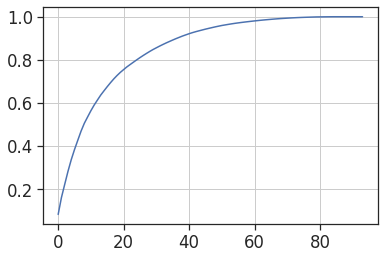

In [147]:
# Análisis de features más importantes
from sklearn.decomposition import PCA
sk_pca = PCA()
sk_pca.fit(X_train)

plt.plot(np.cumsum(sk_pca.explained_variance_ratio_)); plt.grid(True);